#1. Import library

In [0]:
from google.colab import drive
drive.mount("/content/drive/")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
!pip install SIMPLEITK

     |████████████████████████████████| 42.5MB 71kB/s 


In [0]:
import glob
import numpy as np
import SimpleITK as sitk
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from natsort import natsorted

# 2. Draw histogram

In [0]:
def Histogram(segmentations,volumes,show_histagram=False,save_path=None):
        print('Processing.......')
        assert len(segmentations) == len(volumes),"Volume and Segmentation are not same size!"
  
        result_tumor=[0]*2001
        for x,y in zip(volumes,segmentations):
            print(x)
            # Read medical image
            vol = np.array(sitk.GetArrayFromImage(sitk.ReadImage(str(x))))
            seg = np.array(sitk.GetArrayFromImage(sitk.ReadImage(str(y))))
            
            # Crop tumor box
            if (seg.max()!=2):
              print("data not have tumor: ",x)
              continue
            index = np.where(seg==2)
            maxidx = np.max(index,axis=1)
            minidx = np.min(index,axis=1)
            vol = vol[minidx[0]:maxidx[0],minidx[1]:maxidx[1],minidx[2]:maxidx[2]]
            seg = seg[minidx[0]:maxidx[0],minidx[1]:maxidx[1],minidx[2]:maxidx[2]]
            
            #Get tumor hounsfield
            seg_tumor = seg.copy()
            seg_tumor[seg_tumor==1] = 0
            seg_tumor[seg_tumor==2] = 1
            seg_tumor = np.multiply(vol,seg_tumor)

            for i in seg_tumor.flatten():
                if i != 0 and i<=1000 and i>=-1000:
                    result_tumor[int(i+1000)]+=1 
            print("Complete the data: ",x)
              
        list_pixel=[]
        total=1
        for i in result_tumor:
          if i!=0:
            total=total*i
        for i in range(len(result_tumor)):
            for index in range(result_tumor[i]):
              list_pixel.append(i-1000)

        if (show_histagram):
              plt.figure(figsize=(8,6))
              gapminder = pd.DataFrame(list_pixel,columns=["Hounsfield Unit"])
              sns.distplot(gapminder['Hounsfield Unit'],kde = False,color='blue', bins=30 , label='Khối U')
            
              # Plot formatting
              plt.legend(prop={'size': 14})
              plt.title('Mật độ phân bố điểm ảnh của bệnh nhân')
              plt.xlabel('Hounsfield Unit')
              plt.ylabel('Quantum')
              if save_path!=None:
                plt.savefig(save_path + "HistogramPatient_"+ str(x)[-5:-4] +".png", dpi=400, bbox_inches="tight")

In [0]:
volume_path=glob.glob("/content/drive/My Drive/LITS Challenge/Training Batch 1/vol*") + glob.glob("/content/drive/My Drive/LITS Challenge/Training Batch 2/vol*")
segmetation_path=glob.glob("/content/drive/My Drive/LITS Challenge/Training Batch 1/seg*") + glob.glob("/content/drive/My Drive/LITS Challenge/Training Batch 2/seg*")
volume_path=natsorted(volume_path)
segmetation_path=natsorted(segmetation_path)
print(volume_path)
print(segmetation_path)

['/content/drive/My Drive/LITS Challenge/Training Batch 1/volume-0.nii', '/content/drive/My Drive/LITS Challenge/Training Batch 1/volume-1.nii', '/content/drive/My Drive/LITS Challenge/Training Batch 1/volume-2.nii', '/content/drive/My Drive/LITS Challenge/Training Batch 1/volume-3.nii', '/content/drive/My Drive/LITS Challenge/Training Batch 1/volume-4.nii', '/content/drive/My Drive/LITS Challenge/Training Batch 1/volume-5.nii', '/content/drive/My Drive/LITS Challenge/Training Batch 1/volume-6.nii', '/content/drive/My Drive/LITS Challenge/Training Batch 1/volume-7.nii', '/content/drive/My Drive/LITS Challenge/Training Batch 1/volume-8.nii', '/content/drive/My Drive/LITS Challenge/Training Batch 1/volume-9.nii', '/content/drive/My Drive/LITS Challenge/Training Batch 1/volume-10.nii', '/content/drive/My Drive/LITS Challenge/Training Batch 1/volume-11.nii', '/content/drive/My Drive/LITS Challenge/Training Batch 1/volume-12.nii', '/content/drive/My Drive/LITS Challenge/Training Batch 1/vol

Processing.......
/content/drive/My Drive/LITS Challenge/Training Batch 1/volume-0.nii
Complete the data:  /content/drive/My Drive/LITS Challenge/Training Batch 1/volume-0.nii
/content/drive/My Drive/LITS Challenge/Training Batch 1/volume-1.nii
Complete the data:  /content/drive/My Drive/LITS Challenge/Training Batch 1/volume-1.nii
/content/drive/My Drive/LITS Challenge/Training Batch 1/volume-2.nii
Complete the data:  /content/drive/My Drive/LITS Challenge/Training Batch 1/volume-2.nii
/content/drive/My Drive/LITS Challenge/Training Batch 1/volume-3.nii
Complete the data:  /content/drive/My Drive/LITS Challenge/Training Batch 1/volume-3.nii
/content/drive/My Drive/LITS Challenge/Training Batch 1/volume-4.nii
Complete the data:  /content/drive/My Drive/LITS Challenge/Training Batch 1/volume-4.nii
/content/drive/My Drive/LITS Challenge/Training Batch 1/volume-5.nii
Complete the data:  /content/drive/My Drive/LITS Challenge/Training Batch 1/volume-5.nii
/content/drive/My Drive/LITS Chall

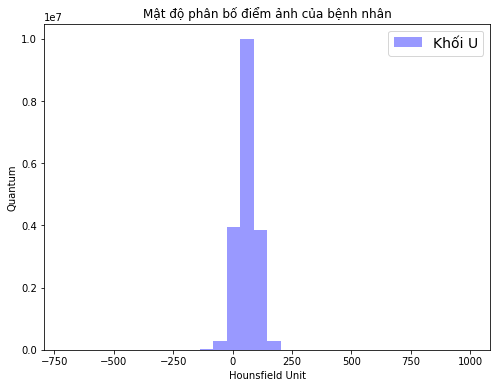

In [0]:
Histogram(segmetation_path,volume_path,show_histagram=True,save_path="/content/drive/My Drive/Luan Van 2019/Tumor/Report/")

# 3. Information of tumor

In [0]:
!pip install connected-components-3d

     |████████████████████████████████| 952kB 4.7MB/s 


In [0]:
import cc3d
import numpy as np

In [0]:
import csv
def Information(segmentations,type="npy"):
  with open('/content/drive/My Drive/Luan Van 2019/Tumor/log/infor_tumor2.csv', mode='w') as csv_file:
      fieldnames = ['Patient', 'Tumor', 'Position x','Position y','Position z','x','y','z','Group']
      writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
      writer.writeheader()
      number_patient=1
      
      max_tumor=0
      min_tumor=300*300*300
      index_max=[]
      index_min=[]
      dir_max=""
      dir_min=""
      average_tumor=0

      non_have_tumor=0

      # 16x16x16 < 4096
      group_a=0
      # 64x64x64 < 262144
      group_b=0
      # >64x64x64
      group_c=0

      for x in segmentations:
        mask =0 
        if type=="npy":
          mask=np.array(sitk.GetArrayFromImage(sitk.ReadImage(str(x))))
          mask=np.moveaxis(mask, 0, -1)
        #else: numpy file
        else:
          mask=np.load(x)
    
        labels_out = cc3d.connected_components(mask)
        list_tumor= np.unique(labels_out)[1:]

        if len(list_tumor)==0:
          non_have_tumor+=1
        for y in list_tumor: 
          tumor_index=np.where(labels_out== y)
          maxidx = np.max(tumor_index,axis=1)
          minidx = np.min(tumor_index,axis=1)
          
          volume_tumor=(maxidx[0] -minidx[0]) * (maxidx[1] -minidx[1]) *(maxidx[2] -minidx[2])
          if average_tumor!=0 and volume_tumor!=0:
            average_tumor= (volume_tumor + average_tumor)/2
          if average_tumor==0 and volume_tumor!=0:
            average_tumor=volume_tumor
          if volume_tumor>max_tumor:
            max_tumor= volume_tumor 
            index_max=tumor_index
            dir_max=x
          if volume_tumor < min_tumor:
            min_volume= volume_tumor
            index_min=tumor_index
            dir_min=x
          group=''
          if volume_tumor< 4096:
            group='a'
            group_a+=1
          elif volume_tumor< 262144:
            group='b'
            group_b+=1
          elif volume_tumor > 262144:
            group='c'
            group_c+=1
          
          writer.writerow({'Patient': number_patient, 'Tumor': y ,'Position x': str(minidx[0]) +'-' +str(maxidx[0]), 
                       'Position y': str(minidx[1]) +'-'+ str(maxidx[1]),'Position z': str(minidx[2]) +'-'+ str(maxidx[2]),
                       'x': maxidx[0] -minidx[0], 'y': maxidx[1] -minidx[1], 'z': maxidx[2] -minidx[2], 'Group':group
                       })
        
        print("Complete patient ",number_patient," of ",len(segmentations))
        number_patient+=1

      print("max volume of tumor is: ",max_tumor)
      print("The image have max tumor is: ",dir_max)
      maxidx = np.max(index_max,axis=1)
      minidx = np.min(index_max,axis=1)
      print("The size of max tumor is: ",maxidx[0]-minidx[0]," x ",maxidx[1]-minidx[1]," x ",maxidx[2]-minidx[2])

      print("min volume of tumor is: ",min_volume)
      print("The image have min tumor is: ",dir_min)
      maxidx = np.max(index_min,axis=1)
      minidx = np.min(index_min,axis=1)
      print("The size of max tumor is: ",maxidx[0]-minidx[0]," x ",maxidx[1]-minidx[1]," x ",maxidx[2]-minidx[2])

      print("Have ",non_have_tumor, "image dont have tumor")
      print("average volume of tumor is :",average_tumor)
      print("The number of tumor have size smaller than 16x16x16 is: ",group_a)
      print("The number of tumor have size bigger than 16x16x16 and smaller than 64x64x64 is: ",group_b)
      print("The number of tumor have size bigger than 64x64x64 is: ",group_c)
      return index_max,index_min

      

In [0]:
volume_path=glob.glob("/content/drive/My Drive/Dataset2/resample_data/vol*") 
segmetation_path=glob.glob("/content/drive/My Drive/Dataset2/resample_data/seg*")
volume_path=natsorted(volume_path)
segmetation_path=natsorted(segmetation_path)
print(volume_path)
print(segmetation_path)

['/content/drive/My Drive/Dataset2/resample_data/volume-001.nii.gz', '/content/drive/My Drive/Dataset2/resample_data/volume-002.nii.gz', '/content/drive/My Drive/Dataset2/resample_data/volume-003.nii.gz', '/content/drive/My Drive/Dataset2/resample_data/volume-004.nii.gz', '/content/drive/My Drive/Dataset2/resample_data/volume-005.nii.gz', '/content/drive/My Drive/Dataset2/resample_data/volume-006.nii.gz', '/content/drive/My Drive/Dataset2/resample_data/volume-007.nii.gz', '/content/drive/My Drive/Dataset2/resample_data/volume-008.nii.gz', '/content/drive/My Drive/Dataset2/resample_data/volume-009.nii.gz', '/content/drive/My Drive/Dataset2/resample_data/volume-010.nii.gz', '/content/drive/My Drive/Dataset2/resample_data/volume-011.nii.gz', '/content/drive/My Drive/Dataset2/resample_data/volume-012.nii.gz', '/content/drive/My Drive/Dataset2/resample_data/volume-013.nii.gz', '/content/drive/My Drive/Dataset2/resample_data/volume-014.nii.gz', '/content/drive/My Drive/Dataset2/resample_data

In [0]:
index_max,index_min=Information(segmetation_path)

Complete patient  1  of  105
Complete patient  2  of  105
Complete patient  3  of  105
Complete patient  4  of  105
Complete patient  5  of  105
Complete patient  6  of  105
Complete patient  7  of  105
Complete patient  8  of  105
Complete patient  9  of  105
Complete patient  10  of  105
Complete patient  11  of  105
Complete patient  12  of  105
Complete patient  13  of  105
Complete patient  14  of  105
Complete patient  15  of  105
Complete patient  16  of  105
Complete patient  17  of  105
Complete patient  18  of  105
Complete patient  19  of  105
Complete patient  20  of  105
Complete patient  21  of  105
Complete patient  22  of  105
Complete patient  23  of  105
Complete patient  24  of  105
Complete patient  25  of  105
Complete patient  26  of  105
Complete patient  27  of  105
Complete patient  28  of  105
Complete patient  29  of  105
Complete patient  30  of  105
Complete patient  31  of  105
Complete patient  32  of  105
Complete patient  33  of  105
Complete patient  3

In [0]:
maxidx = np.max(index_max,axis=1)
minidx = np.min(index_max,axis=1)
print("x1-x2: ",minidx[0],'-',maxidx[0])
print("x2-x3: ",minidx[1],'-',maxidx[1])
print("x3-x4: ",minidx[2],'-',maxidx[2])
print("===============================")
maxidx = np.max(index_min,axis=1)
minidx = np.min(index_min,axis=1)
print("x1-x2: ",minidx[0],'-',maxidx[0])
print("x2-x3: ",minidx[1],'-',maxidx[1])
print("x3-x4: ",minidx[2],'-',maxidx[2])

x1-x2:  132 - 329
x2-x3:  74 - 182
x3-x4:  278 - 472
x1-x2:  180 - 184
x2-x3:  72 - 75
x3-x4:  259 - 260


## Test fuction

In [0]:
image_1 = sitk.ReadImage(volume_path[4])
img_arr_1= sitk.GetArrayFromImage(image_1)
image_1 = np.moveaxis(img_arr_1, 0, -1)

mask_1=sitk.ReadImage(segmetation_path[4])
mask_arr_1=sitk.GetArrayFromImage(mask_1)
mask_1 = np.moveaxis(mask_arr_1, 0, -1)

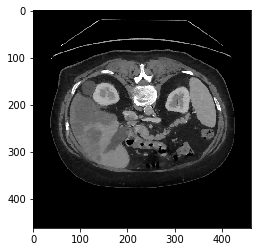

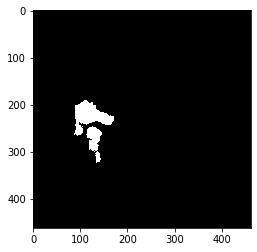

In [0]:
plt.imshow(image_1[:,:,340],cmap="gray")
plt.show()
plt.imshow(mask_1[:,:,340],cmap="gray")
plt.show()

# 4. Draw Voxel Ratio

In [0]:
def PixelRatio(segmentations,scale=200000,save_path=None):
        print('Processing.......')
        
        backgroundPixels = 0
        liverPixels = 0
        tumorPixels = 0
        
        for x in segmentations:
            seg = np.load(x)

            backgroundPixels = backgroundPixels + len(np.where(seg==0)[0])
            tumorPixels += len(np.where(seg==1)[0])
        Total = backgroundPixels + liverPixels + tumorPixels
        Data = np.array([backgroundPixels,tumorPixels])
        Labels = np.array(["Background","Liver lesion"])
        Colors = np.array(["Pink","Green"])
        sns.set(font_scale=1.2)
        
        plt.figure(figsize=(8,8))
        ax = sns.barplot(x=Labels, y=Data, dodge=False,palette = Colors)
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,height + scale,'{:1.4f}'.format(height/Total),ha="center")
        
        # Plot formatting
        plt.legend(prop={'size': 14})
        plt.ylabel('Quantum')
        if (save_path!=None):
          plt.savefig(save_path + "/PixelRatio2.png", dpi=400, bbox_inches="tight")

In [0]:
segmetation_path=glob.glob("/content/drive/My Drive/Dataset2/data/data_4/train/gt*")
segmetation_path=natsorted(segmetation_path)
print(segmetation_path)

['/content/drive/My Drive/Dataset2/data/data_4/train/gt-n0240-s64_64_64.part001.npy', '/content/drive/My Drive/Dataset2/data/data_4/train/gt-n0240-s64_64_64.part002.npy', '/content/drive/My Drive/Dataset2/data/data_4/train/gt-n0240-s64_64_64.part003.npy', '/content/drive/My Drive/Dataset2/data/data_4/train/gt-n0240-s64_64_64.part004.npy', '/content/drive/My Drive/Dataset2/data/data_4/train/gt-n0240-s64_64_64.part005.npy', '/content/drive/My Drive/Dataset2/data/data_4/train/gt-n0240-s64_64_64.part006.npy', '/content/drive/My Drive/Dataset2/data/data_4/train/gt-n0240-s64_64_64.part007.npy', '/content/drive/My Drive/Dataset2/data/data_4/train/gt-n0240-s64_64_64.part008.npy', '/content/drive/My Drive/Dataset2/data/data_4/train/gt-n0240-s64_64_64.part009.npy', '/content/drive/My Drive/Dataset2/data/data_4/train/gt-n0240-s64_64_64.part010.npy', '/content/drive/My Drive/Dataset2/data/data_4/train/gt-n0240-s64_64_64.part011.npy', '/content/drive/My Drive/Dataset2/data/data_4/train/gt-n0240-s64

Processing.......


No handles with labels found to put in legend.


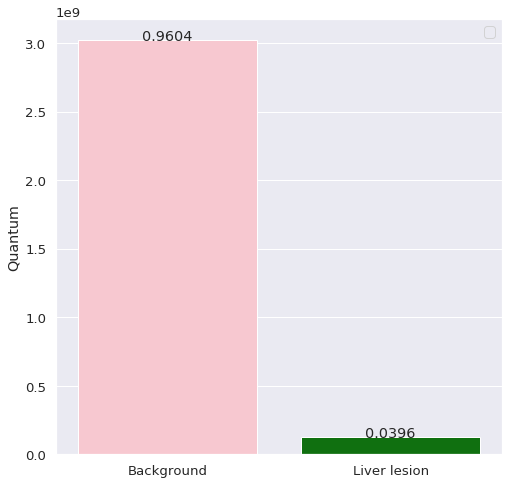

In [0]:
PixelRatio(segmetation_path,save_path="/content/drive/My Drive/Luan Van 2019/Tumor/Report/")

In [0]:
segmetation_path=glob.glob("/content/drive/My Drive/Dataset2/data/data_balanced/train/gt*")
segmetation_path=natsorted(segmetation_path)
print(segmetation_path)

['/content/drive/My Drive/Dataset2/data/data_balanced/train/gt-n0240-s64_64_64.part001.npy', '/content/drive/My Drive/Dataset2/data/data_balanced/train/gt-n0240-s64_64_64.part002.npy', '/content/drive/My Drive/Dataset2/data/data_balanced/train/gt-n0240-s64_64_64.part003.npy', '/content/drive/My Drive/Dataset2/data/data_balanced/train/gt-n0240-s64_64_64.part004.npy', '/content/drive/My Drive/Dataset2/data/data_balanced/train/gt-n0240-s64_64_64.part005.npy', '/content/drive/My Drive/Dataset2/data/data_balanced/train/gt-n0240-s64_64_64.part006.npy', '/content/drive/My Drive/Dataset2/data/data_balanced/train/gt-n0240-s64_64_64.part007.npy', '/content/drive/My Drive/Dataset2/data/data_balanced/train/gt-n0240-s64_64_64.part008.npy', '/content/drive/My Drive/Dataset2/data/data_balanced/train/gt-n0240-s64_64_64.part009.npy', '/content/drive/My Drive/Dataset2/data/data_balanced/train/gt-n0240-s64_64_64.part010.npy', '/content/drive/My Drive/Dataset2/data/data_balanced/train/gt-n0240-s64_64_64.p

Processing.......


No handles with labels found to put in legend.


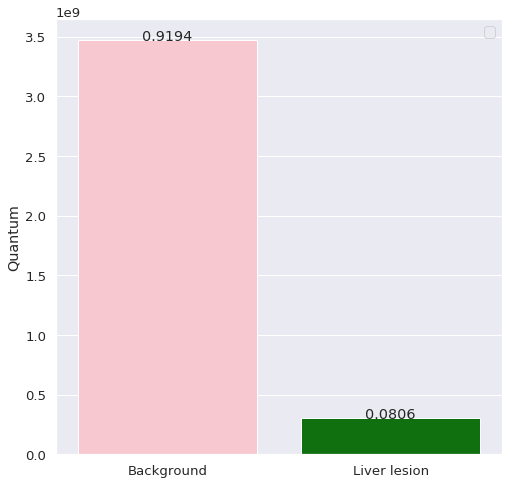

In [0]:
PixelRatio(segmetation_path,save_path="/content/drive/My Drive/Luan Van 2019/Tumor/Report/")